<a href="https://colab.research.google.com/github/isaac-debug/qunatitive-invest/blob/main/0050_TW_Srategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0050.TW Strategy

In [ ]:
pip install yfinance --upgrade --no-cache-dir # https://pypi.org/project/yfinance/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 6.4 MB/s 
     |████████████████████████████████| 62 kB 28.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## revenue of 0050

In [ ]:
import yfinance as yf
stock = yf.Ticker("0050.TW")
data = stock.history(period="max")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01-02,60.009998,60.009998,60.009998,60.009998,0,0,0
2008-01-03,58.889999,58.889999,58.889999,58.889999,0,0,0
2008-01-04,59.009998,59.009998,59.009998,59.009998,0,0,0
2008-01-07,56.389999,56.389999,56.389999,56.389999,0,0,0
2008-01-08,56.980000,56.980000,56.980000,56.980000,0,0,0
...,...,...,...,...,...,...,...
2022-06-20,120.900002,120.949997,119.500000,119.750000,10564277,0,0
2022-06-21,120.949997,122.199997,120.349998,122.199997,6482625,0,0
2022-06-22,121.699997,121.699997,119.349998,119.500000,15108994,0,0


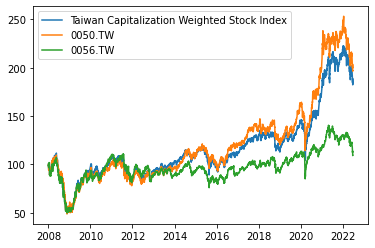

In [ ]:
data['Adj Close'] = data['Close'] * 1.6666

stock = yf.Ticker("^TWII")
data2 = stock.history(period="max")
data2 = data2['2008-01-02':]
data2['Adj Close'] = data2['Close'] / 83.23

stock = yf.Ticker("0056.TW")
data56 = stock.history(period="max")
data56['Adj Close'] = data56['Close'] * 3.89

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data['Adj Close'], label = '0050.TW')
plt.plot(data56['Adj Close'], label = '0056.TW')


plt.legend()

plt.show()

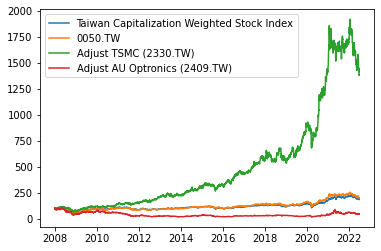

In [ ]:
stock = yf.Ticker("2330.TW")
data4 = stock.history(period="max")
data4 = data4['2008-01-02':]
data4['Adj Close'] = data4['Close'] + data4['Dividends']
data4['Adj Close'] /= 35.28
data4['Adj Close'] *= 100

stock = yf.Ticker("2409.TW")
data5 = stock.history(period="max")
data5 = data5['2008-01-02':]
data5['Adj Close'] = data5['Close'] + data5['Dividends']
data5['Adj Close'] /= 37.58
data5['Adj Close'] *= 100

# data5[data5['Dividends'] != 0.0]
# data5['2008-07-30':'2009-08-4'].head(30)

# stock = yf.Ticker("2317.TW")
# data6 = stock.history(period="max")
# data6 = data6['2008-01-02':]
# data6['Adj Close'] = data6['Close'] + data['Dividends']
# data6['Adj Close'] /= 1.079

# data6[data6['Stock Splits'] != 0.0]

# stock = yf.Ticker("2881.TW")
# data7 = stock.history(period="max")
# data7 = data7['2008-01-02':]
# data7['Adj Close'] = data7['Close'] + data['Dividends']
# data7['Adj Close'] *= 4.597
# data7

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data['Adj Close'], label = '0050.TW')
plt.plot(data4['Adj Close'], label = 'Adjust TSMC (2330.TW)')
plt.plot(data5['Adj Close'], label = 'Adjust AU Optronics (2409.TW)')

plt.legend()

plt.show()


## 0050 Moving Average Strategy

### MA3 >= MA5


*   Buy： MA3 >= MA5
*   Sell： MA3 < MA5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

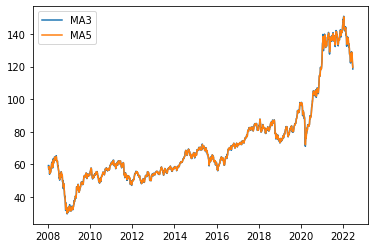

In [ ]:
# 0050 pick time
data50 = data[['Open', 'Close', 'Adj Close']]
data50['Earning Rate'] = data50['Close'].pct_change()
data50['MA3'] = data50['Close'].rolling(3).mean()
data50['MA5'] = data50['Close'].rolling(5).mean()
data50['indicator'] = (data50['MA3'] >= data50['MA5'])
# plt.plot(data50['Close'], label = '0050.TW')
plt.plot(data50['MA3'], label = 'MA3')
plt.plot(data50['MA5'], label = 'MA5')

plt.legend()

plt.show()

#### Calculate Cumulative Earning



1.   Buy: Buy at tomorrow Open
2.   Sell: Sell at tomorrow Close



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Date
2008-01-02    100.000000
2008-01-03    100.000000
2008-01-04    100.000000
2008-01-07    100.000000
2008-01-08    100.000000
                 ...    
2022-06-20    224.534533
2022-06-21    224.534533
2022-06-22    224.534533
2022-06-23    224.534533
2022-06-24    224.534533
Name: cumulative earning, Length: 3560, dtype: float64


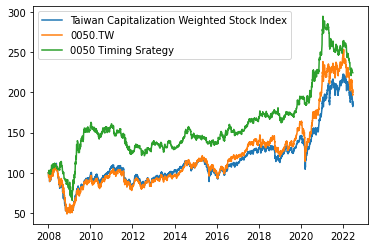

In [ ]:
data50['cumulative earning'] = 100

for i in range(1, len(data)):
  if data50['indicator'].iloc[i-1] == False:
    # sell at today / calculate today's rearning
    if data50['indicator'].iloc[i-2] == True:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])
    # keep empty / same cum earning
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1]
  else:
    # buy at today open
    if data50['indicator'].iloc[i-2] == False:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * (1 + (data50['Close'].iloc[i] - data50['Open'].iloc[i])/data50['Open'].iloc[i])
    # hold
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])

print(data50['cumulative earning'])

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data50['Adj Close'], label = '0050.TW')
plt.plot(data50['cumulative earning'], label = '0050 Timing Srategy')

plt.legend()

plt.show()

### MA2 > MA3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

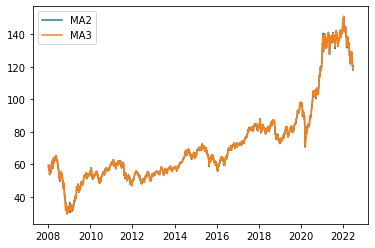

In [ ]:
# 0050 pick time
data50 = data[['Open', 'Close', 'Adj Close']]
data50['Earning Rate'] = data50['Close'].pct_change()
data50['MA2'] = data50['Close'].rolling(2).mean()
data50['MA3'] = data50['Close'].rolling(3).mean()
data50['indicator'] = (data50['MA2'] >= data50['MA3'])
# plt.plot(data50['Close'], label = '0050.TW')
plt.plot(data50['MA2'], label = 'MA2')
plt.plot(data50['MA3'], label = 'MA3')

plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Date
2008-01-02    100.000000
2008-01-03    100.000000
2008-01-04    100.000000
2008-01-07    100.000000
2008-01-08    100.000000
                 ...    
2022-06-20    172.858238
2022-06-21    172.858238
2022-06-22    169.733443
2022-06-23    167.460863
2022-06-24    167.815954
Name: cumulative earning, Length: 3560, dtype: float64


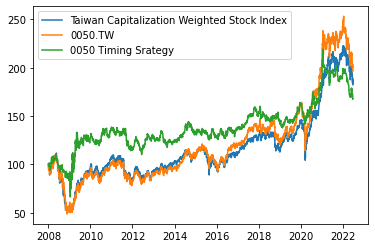

In [ ]:
data50['cumulative earning'] = 100

for i in range(1, len(data)):
  if data50['indicator'].iloc[i-1] == False:
    # sell at today / calculate today's rearning
    if data50['indicator'].iloc[i-2] == True:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])
    # keep empty / same cum earning
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1]
  else:
    # buy at today open
    if data50['indicator'].iloc[i-2] == False:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * (1 + (data50['Close'].iloc[i] - data50['Open'].iloc[i])/data50['Open'].iloc[i])
    # hold
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])

print(data50['cumulative earning'])

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data50['Adj Close'], label = '0050.TW')
plt.plot(data50['cumulative earning'], label = '0050 Timing Srategy')

plt.legend()

plt.show()

### MA5 > MA10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

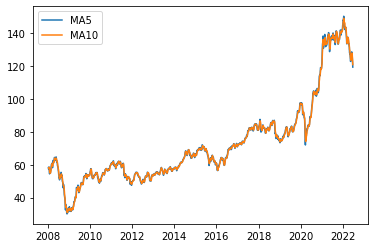

In [ ]:
# 0050 pick time
data50 = data[['Open', 'Close', 'Adj Close']]
data50['Earning Rate'] = data50['Close'].pct_change()
data50['MA5'] = data50['Close'].rolling(5).mean()
data50['MA10'] = data50['Close'].rolling(10).mean()
data50['indicator'] = (data50['MA5'] >= data50['MA10'])
# plt.plot(data50['Close'], label = '0050.TW')
plt.plot(data50['MA5'], label = 'MA5')
plt.plot(data50['MA10'], label = 'MA10')

plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Date
2008-01-02    100.000000
2008-01-03    100.000000
2008-01-04    100.000000
2008-01-07    100.000000
2008-01-08    100.000000
                 ...    
2022-06-20    137.600225
2022-06-21    137.600225
2022-06-22    137.600225
2022-06-23    137.600225
2022-06-24    137.600225
Name: cumulative earning, Length: 3560, dtype: float64


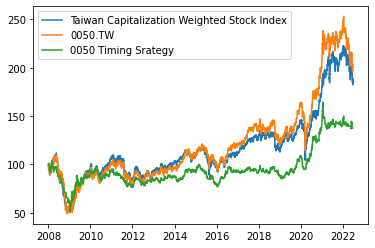

In [ ]:
data50['cumulative earning'] = 100

for i in range(1, len(data)):
  if data50['indicator'].iloc[i-1] == False:
    # sell at today / calculate today's rearning
    if data50['indicator'].iloc[i-2] == True:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])
    # keep empty / same cum earning
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1]
  else:
    # buy at today open
    if data50['indicator'].iloc[i-2] == False:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * (1 + (data50['Close'].iloc[i] - data50['Open'].iloc[i])/data50['Open'].iloc[i])
    # hold
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])

print(data50['cumulative earning'])

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data50['Adj Close'], label = '0050.TW')
plt.plot(data50['cumulative earning'], label = '0050 Timing Srategy')

plt.legend()

plt.show()

### Close >= MA5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

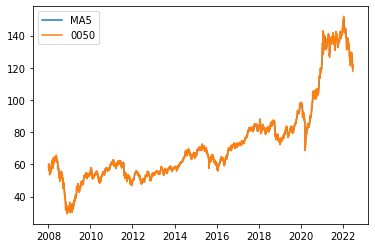

In [ ]:
# 0050 pick time
data50 = data[['Open', 'Close', 'Adj Close']]
data50['Earning Rate'] = data50['Close'].pct_change()
data50['MA5'] = data50['Close'].rolling(5).mean()
data50['indicator'] = (data50['Close'] >= data50['MA5'])
# plt.plot(data50['Close'], label = '0050.TW')
plt.plot(data50['MA5'], label = 'MA5')
plt.plot(data50['Close'], label = '0050')

plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

Date
2008-01-02    100.000000
2008-01-03    100.000000
2008-01-04    100.000000
2008-01-07    100.000000
2008-01-08    100.000000
                 ...    
2022-06-20    138.278338
2022-06-21    138.278338
2022-06-22    135.778651
2022-06-23    133.960696
2022-06-24    133.960696
Name: cumulative earning, Length: 3560, dtype: float64


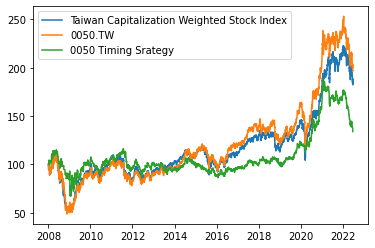

In [ ]:
data50['cumulative earning'] = 100

for i in range(1, len(data)):
  if data50['indicator'].iloc[i-1] == False:
    # sell at today / calculate today's rearning
    if data50['indicator'].iloc[i-2] == True:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])
    # keep empty / same cum earning
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1]
  else:
    # buy at today open
    if data50['indicator'].iloc[i-2] == False:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * (1 + (data50['Close'].iloc[i] - data50['Open'].iloc[i])/data50['Open'].iloc[i])
    # hold
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])

print(data50['cumulative earning'])

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data50['Adj Close'], label = '0050.TW')
plt.plot(data50['cumulative earning'], label = '0050 Timing Srategy')

plt.legend()

plt.show()

### Close >= MA3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

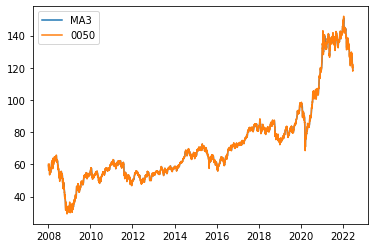

In [ ]:
# 0050 pick time
data50 = data[['Open', 'Close', 'Adj Close']]
data50['Earning Rate'] = data50['Close'].pct_change()
data50['MA3'] = data50['Close'].rolling(3).mean()
data50['indicator'] = (data50['Close'] >= data50['MA3'])
# plt.plot(data50['Close'], label = '0050.TW')
plt.plot(data50['MA3'], label = 'MA3')
plt.plot(data50['Close'], label = '0050')

plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

Date
2008-01-02    100.000000
2008-01-03    100.000000
2008-01-04    100.000000
2008-01-07    100.000000
2008-01-08    100.000000
                 ...    
2022-06-20    165.270785
2022-06-21    165.270785
2022-06-22    162.283150
2022-06-23    160.110323
2022-06-24    160.110323
Name: cumulative earning, Length: 3560, dtype: float64


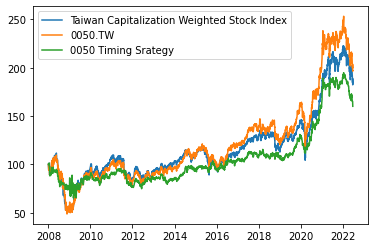

In [ ]:
data50['cumulative earning'] = 100

for i in range(1, len(data)):
  if data50['indicator'].iloc[i-1] == False:
    # sell at today / calculate today's rearning
    if data50['indicator'].iloc[i-2] == True:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])
    # keep empty / same cum earning
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1]
  else:
    # buy at today open
    if data50['indicator'].iloc[i-2] == False:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * (1 + (data50['Close'].iloc[i] - data50['Open'].iloc[i])/data50['Open'].iloc[i])
    # hold
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])

print(data50['cumulative earning'])

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data50['Adj Close'], label = '0050.TW')
plt.plot(data50['cumulative earning'], label = '0050 Timing Srategy')

plt.legend()

plt.show()

### MA2 >= MA5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

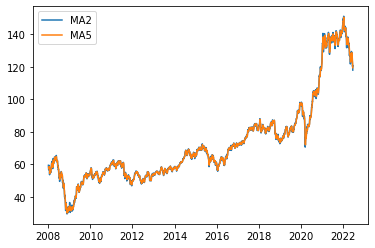

In [ ]:
# 0050 pick time
data50 = data[['Open', 'Close', 'Adj Close']]
data50['Earning Rate'] = data50['Close'].pct_change()
data50['MA2'] = data50['Close'].rolling(2).mean()
data50['MA5'] = data50['Close'].rolling(5).mean()
data50['indicator'] = (data50['MA2'] >= data50['MA5'])
# plt.plot(data50['Close'], label = '0050.TW')
plt.plot(data50['MA2'], label = 'MA2')
plt.plot(data50['MA5'], label = 'MA5')

plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Date
2008-01-02    100.000000
2008-01-03    100.000000
2008-01-04    100.000000
2008-01-07    100.000000
2008-01-08    100.000000
                 ...    
2022-06-20    140.542048
2022-06-21    140.542048
2022-06-22    140.542048
2022-06-23    140.542048
2022-06-24    140.542048
Name: cumulative earning, Length: 3560, dtype: float64


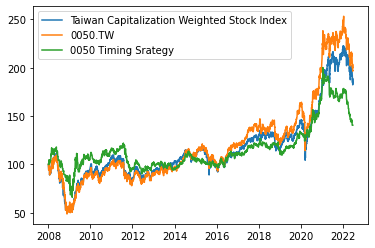

In [ ]:
data50['cumulative earning'] = 100

for i in range(1, len(data)):
  if data50['indicator'].iloc[i-1] == False:
    # sell at today / calculate today's rearning
    if data50['indicator'].iloc[i-2] == True:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])
    # keep empty / same cum earning
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1]
  else:
    # buy at today open
    if data50['indicator'].iloc[i-2] == False:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * (1 + (data50['Close'].iloc[i] - data50['Open'].iloc[i])/data50['Open'].iloc[i])
    # hold
    else:
      data50['cumulative earning'].iloc[i] = data50['cumulative earning'].iloc[i-1] * ( 1 + data50['Earning Rate'].iloc[i])

print(data50['cumulative earning'])

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data50['Adj Close'], label = '0050.TW')
plt.plot(data50['cumulative earning'], label = '0050 Timing Srategy')

plt.legend()

plt.show()

## Rotation Strategy

### 0050 and 0056

In [ ]:
print(data56)

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2008-01-02  25.700001  25.700001  25.700001  25.700001         0          0   
2008-01-03  25.230000  25.230000  25.230000  25.230000         0          0   
2008-01-04  25.510000  25.510000  25.510000  25.510000         0          0   
2008-01-07  24.850000  24.850000  24.850000  24.850000         0          0   
2008-01-08  25.379999  25.379999  25.379999  25.379999         0          0   
...               ...        ...        ...        ...       ...        ...   
2022-06-20  29.620001  29.639999  28.820000  28.870001  60929282          0   
2022-06-21  29.000000  29.299999  28.870001  29.280001  19412802          0   
2022-06-22  29.240000  29.250000  28.480000  28.500000  50190765          0   
2022-06-23  28.540001  28.620001  27.910000  28.049999  54694605          0   
2022-06-24  28.230000  28.400000  28.020000  28.1000